### Чем хороша линейная регрессия?
* Быстрая
* Простая в осовении
* Мало параметров, которые надо подкручивать
* Легко интерпретируемая

### Библиотеки
Основная библиотека, с которой вы будете работать в этом курсе, это [scikit-learn](http://scikit-learn.org). На сайте есть описание всех моделей, а также User Guides к ним. Стоит почитать на досуге.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Датасет о рекламной кампании

In [2]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


В датасете показаны результаты продаж разных товаров в зависимости от ресурсов (тысяч долларов), которые вложили в различные средства распространения информации:
* TV - реклама по телевизору
* radio - на радио
* newspapers - в газетах

Целевая переменная:
* sales - продажи такого-то товара (тысячи штук)

In [3]:
# Размеры датасета
data.shape

(200, 4)

Признаков немного, поэтому давайте попробуем визуализиовать зависимость целевой переменной от каждого из признаков.

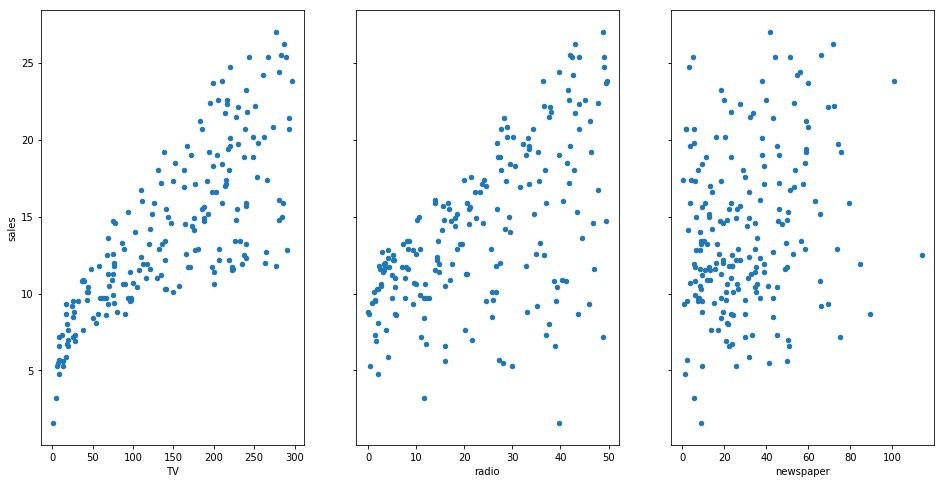

In [5]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

### Простая линейная регрессия

Из графиков выше предположим, что только размер рекламы на телевизоре влияет на продажи больше всего. Формула для такого случая выглядит следующим образом:
$$y=\beta_0+\beta_1x$$
Здесь:
* $y$ - наше предсказание продаж
* $x$ - сколько денег вложили в рекламу по телевидению
* $\beta_0$ - сдвиг
* $\beta_1$ - параметр, отвечающий за важность признака x

$\beta_0$ и $\beta_1$ - это параметры нашей модели. Чтобы создать хорошую модель, надо "обучить" эти значения. Т.е. изменить их так, чтобы они хорошо работали для нашей задачи.

### Обучение коэффициентов модели

Параметры $\beta_0$ и $\beta_1$ подбираются таким образом, чтобы минимизировать **сумму наименьших квадратов ошибок**:

<img src="https://github.com/justmarkham/DAT4/raw/068d887e4be2eedb1b958b345ae097153f762d75/notebooks/08_estimating_coefficients.png">

* Чёрные точки на даграмме - это полученные истинные значения x и y.
* Синяя линия - это наша модель: линия, которой мы стараемся приблизить данные.
* Красные отрезки - это ошибки нашей модели.

Как коэффициенты $\beta_0$ и $\beta_1$ соотносятся с синей линией:
* $\beta_0$ - это сдвиг нашей прямой, т.е. значение y при x = 0.
* $\beta_1$ - это тангенс угла наклона прямой.
<img src="https://github.com/justmarkham/DAT4/raw/068d887e4be2eedb1b958b345ae097153f762d75/notebooks/08_slope_intercept.png">

Как искать данные коэффициенты? Есть много техник: аналитическое решение, методы основанные на градиентном спуске. Пока же достаточно знать, что многие библиотеки (в том числе и sklearn) умеют это делать. Зачем кожаному мешку напрягаться :)

In [6]:
from sklearn.linear_model import LinearRegression

# Наша модель
reg = LinearRegression()

# Подготовим данные для неё
# На вход требуется 2D матрица, а у нас только один признак,
# и надо превратить его из 1D вектора (n,) в 2D матрицу (n, 1).
# Это можно сделать с помощью метода reshape
x = data["TV"].values.reshape(-1, 1) 
y = data["sales"].values

# Обучаем нашу модель
reg.fit(x, y)

# Коэффициенты
print("Сдвиг={}".format(reg.intercept_))
print("Массив коэффициентов={}".format(reg.coef_))

Сдвиг=7.032593549127693
Массив коэффициентов=[0.04753664]


### Интерпретируем коэффициенты
Что означает коэффициент, связанный с телевидением ($\beta_1$)?
* Дополнительные 1000$, вложенные на в рекламу на телевидении, позволят продажам товара вырасти где-то на 0.047 * 1000 = 47 тысяч единиц.

### Используем модель для предсказания

Окей, допустим мы выходим на новый рынок, в котором на телевидение мы готовы потратить 50000 долларов. Сколько товара это нам даст?
$$y=7.032594+0.047537 * 50$$

In [7]:
# Посчитаем ручками
7.032594 + 0.047537*50

9.409444

Всего мы продадим 9409 единиц товара. А давате теперь спросим sklearn:

In [8]:
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [9]:
reg.predict(X_new)

array([9.40942557])

### Нарисуем нашу прямую

In [10]:
# Возьмём предсказания для данных, на которых обучались
y_pred = reg.predict(x)
y_pred.shape

(200,)

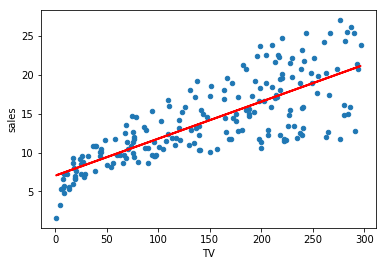

In [15]:
# Сначала выведем истинные данные
data.plot(kind='scatter', x='TV', y='sales')

# Теперь рисуем нашу линию
plt.plot(x, y_pred, c='red', linewidth=2)

Посчитаем ошибку MSE на обучающей выборке:

In [16]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_pred, y))

10.512652915656757


### Используем все признаки

Простую линейную регрессию с одним признаком можно легко расширить на случай нескольких признаков:
$$y=\beta_0+\beta_1x_1+...+\beta_nx_n$$

А для нашего датасета это будет выглядеть так:
$$Sales=\beta_0+\beta_1*TV+\beta_2*radio+\beta_3*newspaper$$

Давайте опять воспользуемся sklearn, чтобы их оценить:

In [17]:
reg = LinearRegression()

X = data.drop("sales", axis=1)
y = data["sales"]

# Обучаем нашу модель
reg.fit(X, y)

# Коэффициенты
print("Сдвиг={}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {}={}".format(column, coef))

Сдвиг=2.9388893694594103
Коэффициент для TV=0.045764645455397615
Коэффициент для radio=0.18853001691820442
Коэффициент для newspaper=-0.0010374930424763007


Вес признака отвечает также, как и в предыдущем случае за значимость этого признака. Для газет он вообще отрицательный. Вычислим ошибку на обучающей выборке.

In [18]:
y_pred = reg.predict(X)

# Ошибка теперь равна:
print(mean_squared_error(y_pred, y))

2.7841263145109365


Ошибка уже меньше, чем при одном признаке, однако измерять ошибку на обучающей выборке неправильно. Помимо истинной зависимости между признаками и целевой переменной, туда могут затесаться случайности, лишние данные и прочие факторы. Если не ограничивать каким-то образом модель (об этом мы узнаем позднее), то модель легко подстраивается под эти шумы. Она начинает показывать очень хорошее качество на обучающей выборке, но когда мы попробуем посмотреть качество на других выборках, то там модель будет показывать себя плохо. Наглядный пример:
<img src="https://i.stack.imgur.com/t0zit.png">

Посередине находится правильная модель, которая угадала истинную зависимость. Справа видно переобученную модель, которая на обучающей выборке (красные крестики) показывает очень хорошее качество, но из рисунка видно, что истинную зависимость она точно не нашла.

Говорят, что такая модель имеет высокую *Variance* (дисперсия). *Variance* - это чувствительность модели к разным выбросам, аномалиям в данных. Если такую модель обучить на немного отличающихся данных, то результаты будут сильно разными.

Слева изображена противоположная ситуация - недообученная модель. Это происходит из-за того, что прямой линией как ни крути не найти истинную зависимость. Т.е. модель слишком простая для такой задачи. Говорят, что у такой модели высокий *bias*, т.е. средняя величина ошибки. Следующая картинка показывает наглядно, что это такое:
<img src="https://elitedatascience.com/wp-content/uploads/2017/06/Bias-vs.-Variance-v5-2-darts.png">

Поэтому в таком случае, для начала разбивают имеющиеся данные на обучающую и тестовую выборки.

In [19]:
# Возьмём 100 для обучения и 100 для теста
threshold = 100
X_train = data.drop('sales', axis=1)[:threshold]
y_train = data["sales"][:threshold]

X_test = data.drop('sales', axis=1)[threshold:]
y_test = data["sales"][threshold:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100, 3), (100, 3), (100,), (100,))

Обучаемся на обучающей выборке и проверяем качество на тестовой.

In [20]:
reg = LinearRegression()
reg.fit(X_train, y_train)

# Ошибка на тестовой выборке
y_pred = reg.predict(X_test)
# Вычислим ошибку и на обучающей выборке для проверки
y_pred_train = reg.predict(X_train)

print("Ошибка на обучающей выборке={0:.2f}".format(mean_squared_error(y_pred_train, y_train)))
print("Ошибка на тестовой выборке={0:.2f}".format(mean_squared_error(y_pred, y_test)))

Ошибка на обучающей выборке=2.32
Ошибка на тестовой выборке=3.38


Как видно, ошибка на тестовой выборке больше, чем на обучающей. Но вам может повезти и всё будет наоборот (на самом деле, я менял threshold до тех пор, пока ошибка на тестовой выборке не будет больше, чем на обучающей. Только тсс..). Чтобы не было таких случайностей, была придумана кросс-валидация.

### Кросс-валидация

Как она работает? Мы делим все имеющиеся данные на $k$ частей. Затем по очереди каждую часть назначем тестовой. На остальных обучаемся, а ошибку измеряем на выбранной части. А затем из всех ошибок находим среднюю. Так у нас не будет той случайности, когда мы удачно поделим выборку.

In [21]:
# Многие выбирают k=5 для начала
k = 5
errors = []

X = data.drop("sales", axis=1)
y = data["sales"]

# Размер одной части
fold_size = len(X) // k

# Мб этот код на семинаре написать?
for i in range(k):
    # Берём все значения, кроме выбранной части
    X_train = X[:i * fold_size].append(X[(i + 1) * fold_size:])
    y_train = y[:i * fold_size].append(y[(i + 1) * fold_size:])
    
    # Берём выбранную часть
    X_test = X[i * fold_size:(i + 1) * fold_size]
    y_test = y[i * fold_size:(i + 1) * fold_size]
    
    # На каждой итерации обучаемся отдельно и сохраняем ошибку
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    errors.append(mean_squared_error(y_pred, y_test))
    
# Выводим ошибку на кросс-валидации
print(np.average(errors))

3.0729465971002123


In [22]:
# А можно не париться и попросить sklearn всё сделать за нас
from sklearn.model_selection import cross_val_score

# Берём с отрицательным знаком, т.к. обычно туда передаётся не функция потерь, которую надо минимизировать
# А что-то вроде "функции успеха", которую надо максимизировать
errors = -cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')
print(np.average(errors))

3.0729465971002123


Видно, что ошибка больше, чем тогда на обучающей выборке, поэтому есть показания думать, что это переобучение. Отчего оно обычно происходит? Мы берём слишком много лишних признаков или делаем модель слишком сложной для данной задачи. Для решения этой задачи существует регуляризация.

### Регуляризация

Регуляризация - это искусстенное занижение всех параметров моделей ($\beta_0,\beta_1,...$). Это помогает упростить модель, т.к. низкие значения $\beta_i$ означают, что модель будет выдавать результаты близкие к прямой (или гиперплоскости, если параметров много). А также зануление некоторых коэффициентов может убрать ненужные признаки из обучения. Однако как всё это сделать так, чтобы не убрать нужные признаки?

Посмотрим на функцию потерь, которую мы минимизируем:
$$L(\beta)=\sum_{i=1}^{N}(y^{true}_i-y^{pred}_i)^2$$

Добавим туда слагаемое, которое поможет нам понизить значения наших $\beta_i$:
$$L(\beta)=\sum_{i=1}^{N}(y^{true}_i-y^{pred}_i)^2 + \lambda \sum_{i=1}^m\beta_i^2$$

Действительно, если мы будем понижать нашу функцию потерь $L(\beta)$, то мы будем минимизировать и второе слагаемое, которое и отвечает за абсолютные величины $\beta_i$. Осталось указать, что $\lambda$ это некоторый числовой коэффициент, который позволяет играться между очень сильной и очень слабой регуляризацией. Если он большой, то регуляризация сильная и модель будет более простой, меньше переобучаться, больше недообучаться, и наоброт. 

Забыл добавить, что это была L2-регуляризация.
L1-регуляризация выглядит так:
$$L(\beta)=\sum_{i=1}^{N}(y^{true}_i-y^{pred}_i)^2 + \lambda \sum_{i=1}^m|\beta_i|$$
Она отличается от L2 тем, что она обнуляет некоторые коэффициенты, а L2 пытается всё уменьшать равномерно.

В sklearn L1-регуляризация - это Lasso, а L2-регуляризация - это Ridge. Давайте посмотрим, какое качество они нам дадут на кросс-валидации.

In [23]:
# L1
from sklearn.linear_model import Lasso

reg = Lasso().fit(X, y)

# Посмотрим на коэффициенты модели
# Коэффициенты
print("Сдвиг={}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {}={}".format(column, coef))
print()

errors = -cross_val_score(Lasso(), X, y, cv=5, scoring='neg_mean_squared_error')
print("Результат={}".format(np.average(errors)))

Сдвиг=3.0402155834803786
Коэффициент для TV=0.045661415380019464
Коэффициент для radio=0.18346439758868255
Коэффициент для newspaper=0.0

Результат=3.041405896751369


Видно, что признак с рекламой в газетах модель захотела полностью убрать из выборки.

In [24]:
# L2
from sklearn.linear_model import Ridge

reg = Ridge().fit(X, y)

# Посмотрим на коэффициенты модели
# Коэффициенты
print("Сдвиг={}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {}={}".format(column, coef))
print()

errors = -cross_val_score(Ridge(), X, y, cv=5, scoring='neg_mean_squared_error')
print("Результат={}".format(np.average(errors)))

Сдвиг=2.938967458330149
Коэффициент для TV=0.0457646436580185
Коэффициент для radio=0.1885250968107854
Коэффициент для newspaper=-0.001036293958906968

Результат=3.072932673298498


Тут модель полностью не зануляла все признаки, а уменьшила их веса некоторых из них, а некоторых увеличила. Но изменения были столь незначительные, что качество не изменилось.

Как видно, качество не сильно улучшилось. Это всё потому что, мы не подбирали параметр параметр lambda (в моделях он называется alpha), а оставили его равным 1.0. Вот тут нам и приходит на помощь кросс-валидация.

Попробуем сначала Lasso. Давайте сначала поступим по тупому, и будем выбирать параметр lambda на обучающей выборке.

In [50]:
lambdas = np.arange(0.1, 3.0, 0.2)
# Выведем доступные lambda
print("Все лямбды:")
print(lambdas)
print(val)
# Лямбды и их ошибки на обучающей выборке
lambda_errors = []

# Проходим по всем лямбдам и записываем ошибки на обучающей выборке
for val in lambdas:
    reg = Lasso(alpha=val).fit(X, y)
    y_pred = reg.predict(X)
    # Сохраняем ошибку на обучающей выборке
    lambda_errors.append((val, mean_squared_error(y_pred, y)))
    

min_val, min_train_error = min(lambda_errors, key=lambda x: x[1])
# Вычислим ошибку на кросс-валидации
# Лучшая модель

best_reg = Lasso(alpha=min_val)
cv_error = -np.average(cross_val_score(best_reg, X, y, cv=5, scoring='neg_mean_squared_error'))

print("\nОптимальная lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, cv_error))

Все лямбды:
[0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9]
2.9000000000000004
[(0.1, 2.7842286851696874), (0.30000000000000004, 2.784985993046452), (0.5000000000000001, 2.7857256993570267), (0.7000000000000001, 2.786835272563889), (0.9000000000000001, 2.7883147049707757), (1.1000000000000003, 2.7901639965776877), (1.3000000000000003, 2.7923831473846246), (1.5000000000000004, 2.794972157391586), (1.7000000000000004, 2.797931026598574), (1.9000000000000004, 2.8012597550055864), (2.1000000000000005, 2.8049583426126237), (2.3000000000000007, 2.809026789419686), (2.5000000000000004, 2.813465095426774), (2.7000000000000006, 2.8182732606338856), (2.9000000000000004, 2.823451285041023)]

Оптимальная lambda:
Lambda=0.10, результат=3.07


А теперь сделайте так, чтобы сохранялась ошибка не на обучающей выборке, а на кросс-валдиации (cross_val_score) и минимум выбирался из неё. 

In [51]:
### ваш код здесь
lambdas = np.arange(0.1, 3.0, 0.2)
# Выведем доступные lambda
print("Все лямбды:")
print(lambdas)
#print(val)
# Лямбды и их ошибки на обучающей выборке
lambda_errors = []

# Проходим по всем лямбдам и записываем ошибки на обучающей выборке
for val in lambdas:
    # Сохраняем ошибку на обучающей выборке-
    curr_errs = -cross_val_score(Lasso(alpha=val), X, y, cv=5, scoring='neg_mean_squared_error')
    lambda_errors.append((val, np.average(curr_errs)))
    

min_val, min_train_error = min(lambda_errors, key=lambda x: x[1])
# Вычислим ошибку на кросс-валидации
# Лучшая модель

best_reg = Lasso(alpha=min_val)
cv_error = -np.average(cross_val_score(best_reg, X, y, cv=5, scoring='neg_mean_squared_error'))

print("\nОптимальная lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, cv_error))

Все лямбды:
[0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9]
2.9000000000000004

Оптимальная lambda:
Lambda=1.90, результат=3.03


Сделайте то же самое для L2-регуляризации:

In [60]:
### ваш код здесь
### ваш код здесь
lambdas = np.arange(10.0, 2000.0, 5.0)
# Выведем доступные lambda
print("Все лямбды:")
print(lambdas)
#print(val)
# Лямбды и их ошибки на обучающей выборке
lambda_errors = []

# Проходим по всем лямбдам и записываем ошибки на обучающей выборке
for val in lambdas:
    # Сохраняем ошибку на обучающей выборке-
    curr_errs = -cross_val_score(Ridge(alpha=val), X, y, cv=5, scoring='neg_mean_squared_error')
    lambda_errors.append((val, np.average(curr_errs)))
    
#print(lambda_errors)
min_val, min_train_error = min(lambda_errors, key=lambda x: x[1])
# Вычислим ошибку на кросс-валидации
# Лучшая модель

best_reg = Ridge(alpha=min_val)
cv_error = -np.average(cross_val_score(best_reg, X, y, cv=5, scoring='neg_mean_squared_error'))

print("\nОптимальная lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, cv_error))

Все лямбды:
[  10.   15.   20.   25.   30.   35.   40.   45.   50.   55.   60.   65.
   70.   75.   80.   85.   90.   95.  100.  105.  110.  115.  120.  125.
  130.  135.  140.  145.  150.  155.  160.  165.  170.  175.  180.  185.
  190.  195.  200.  205.  210.  215.  220.  225.  230.  235.  240.  245.
  250.  255.  260.  265.  270.  275.  280.  285.  290.  295.  300.  305.
  310.  315.  320.  325.  330.  335.  340.  345.  350.  355.  360.  365.
  370.  375.  380.  385.  390.  395.  400.  405.  410.  415.  420.  425.
  430.  435.  440.  445.  450.  455.  460.  465.  470.  475.  480.  485.
  490.  495.  500.  505.  510.  515.  520.  525.  530.  535.  540.  545.
  550.  555.  560.  565.  570.  575.  580.  585.  590.  595.  600.  605.
  610.  615.  620.  625.  630.  635.  640.  645.  650.  655.  660.  665.
  670.  675.  680.  685.  690.  695.  700.  705.  710.  715.  720.  725.
  730.  735.  740.  745.  750.  755.  760.  765.  770.  775.  780.  785.
  790.  795.  800.  805.  810.  815.  8

Если всё было правильно, то данные манипуляции помогут немного улучшить качество вашей модели. Это поднимет вас на несколько мест в соревнованиях, или вашему работодателю даст побольше прибыли.

### Домашнее задание

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Для домашнего задания вы используете другой датасет.

In [4]:
data = pd.read_csv('https://web.stanford.edu/~hastie/Papers/LARS/diabetes.data', sep='\t')
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


В датасете приводится информация о пациентах и их состоянии при заболевании диабетом. Описание признаков можно прочитать [здесь](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html). Колонка Y - целевая переменная:

In [5]:
target = 'Y'
X = data.drop([target], axis=1)
y = data[target]

X.shape, y.shape

((442, 10), (442,))

Ваша задача - провести то же исследование, что и в датасете в самом начале (Sales ~ TV, Radio, Newspaper). В итоге, нужно получить модель линейной регрессии, качество которой надо вывести с помощью cross_val_score с метрикой MSE (тоже самое в общем).

За каждое достойное улучшение качества на cross_val_score будут доп. баллы. Не забудьте описать, что использовали, что получилось и нет, а также попробуйте понять почему. Побольше гуглите. 

Возможные улучшения:
* Нормализация данных: вычитаем из каждой колонки её среднее и делим на её дисперсию.
* Пробуйте убрать ненужные признаки.
* Можно перемножать некоторые признаки.
* Погуглите что-то вроде "improve linear regression".

В общем, представьте, что вы работаете датасаентистом, получаете 300к долларов, а вам сказали, что нужно как можно лучше уметь предсказывать такие данные.

Посмотрим зависимость целевой переменной от каждого из признаков.

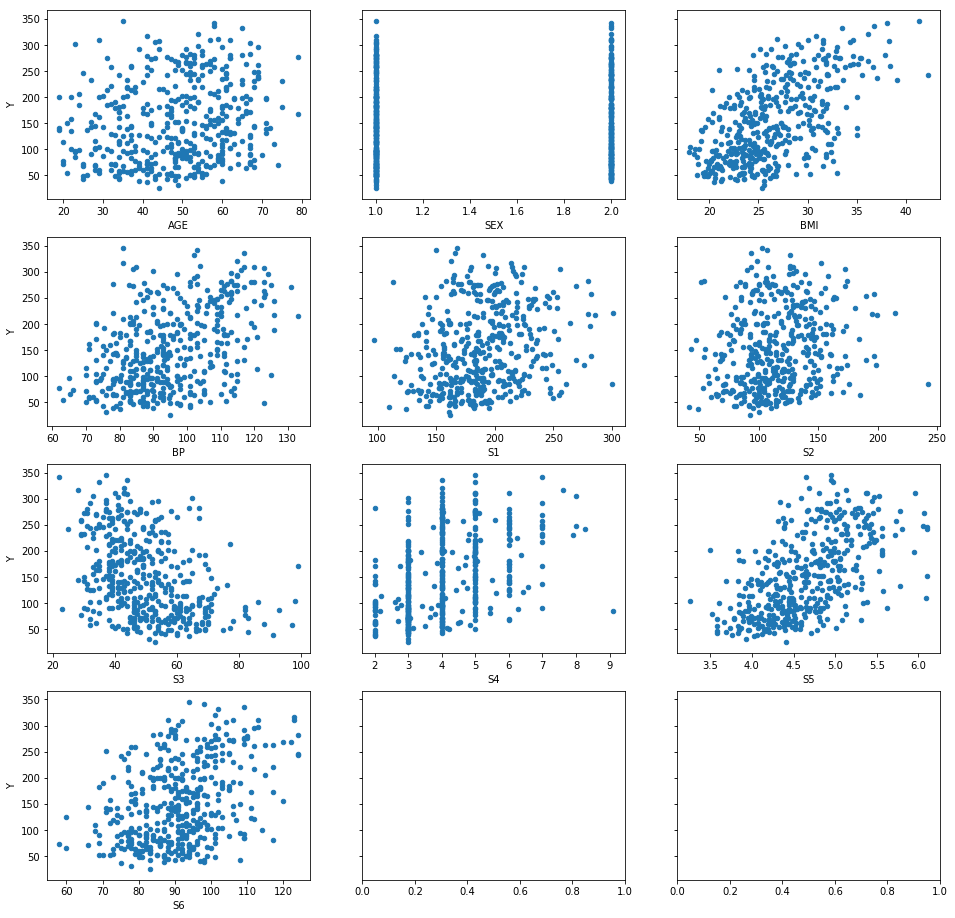

In [28]:
fig, axs = plt.subplots(4, 3, sharey=True)
data.plot(kind='scatter', x='AGE', y=target, ax=axs[0,0], figsize=(16, 16))
data.plot(kind='scatter', x='SEX', y=target, ax=axs[0,1])
data.plot(kind='scatter', x='BMI', y=target, ax=axs[0,2])
data.plot(kind='scatter', x='BP', y=target, ax=axs[1,0])
for i in range(1, 7):
    cx = (i + 3) // 3
    cy = (i + 3) % 3
    data.plot(kind='scatter', x='S'+str(i), y=target, ax=axs[cx,cy])

Импорт

In [7]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

Создаем модель

In [8]:
reg = LinearRegression().fit(X, y)

# Коэффициенты
print("Сдвиг={}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {}={}".format(column, coef))

Сдвиг=-334.5671385187876
Коэффициент для AGE=-0.036361224223619155
Коэффициент для SEX=-22.859648090498375
Коэффициент для BMI=5.602962091923707
Коэффициент для BP=1.1168079933181874
Коэффициент для S1=-1.0899963340632244
Коэффициент для S2=0.7464504555142124
Коэффициент для S3=0.37200471508914457
Коэффициент для S4=6.533831935990326
Коэффициент для S5=68.48312496478833
Коэффициент для S6=0.2801169893214963


Вычисляем ошибку на кросс-валидации

In [9]:
errs = -cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')
print(np.average(errs))

2993.081310469331


Нормализуем данные

In [31]:
X = data.drop([target], axis=1)
y = data[target]
X_norm = (X - X.min()) / (X.max() - X.min())\

reg = LinearRegression().fit(X_norm, y)

# Коэффициенты
print("Сдвиг={}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {}={}".format(column, coef))

errs = -cross_val_score(LinearRegression(), X_norm, y, cv=5, scoring='neg_mean_squared_error')
print(np.average(errs))
X_norm.head()

Сдвиг=-2.0761196515562688
Коэффициент для AGE=-2.1816734534174875
Коэффициент для SEX=-22.85964809049844
Коэффициент для BMI=135.5916826245536
Коэффициент для BP=79.2933675255915
Коэффициент для S1=-222.35925214890096
Коэффициент для S2=149.8872514672566
Коэффициент для S3=28.644363061864595
Коэффициент для S4=46.3248684261714
Коэффициент для S5=195.10157471218537
Коэффициент для S6=18.487721295219245
2993.0813104693307


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394
1,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222437,0.166667
2,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496578,0.409091
3,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572923,0.469697
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362385,0.333333


Попробуем убрать несколько признаков

In [50]:
from sklearn.feature_selection import RFE

model = LinearRegression()
# Переберем кол-во признаков и выберем лучшее
best_cnt = 10
best_cvs = 3000
for i in range(1, 11):
    curr = -cross_val_score(RFE(model, i), X, y, cv=5, scoring='neg_mean_squared_error')
    curr_cvs = np.average(curr)
    if curr_cvs < best_cvs:
        best_cvs = curr_cvs
        best_cnt = i
    print(f'cnt = {i}; cvs = {curr_cvs}')
print(f'best_cnt = {best_cnt}; best_cvs = {best_cvs}')
    

cnt = 1; cvs = 4063.024946464962
cnt = 2; cvs = 4030.8392932945994
cnt = 3; cvs = 3224.908800321309
cnt = 4; cvs = 3219.8361342420285
cnt = 5; cvs = 3078.8711308277707
cnt = 6; cvs = 2950.0371763489725
cnt = 7; cvs = 2954.8144354204346
cnt = 8; cvs = 2962.399408402546
cnt = 9; cvs = 2974.2783609049866
cnt = 10; cvs = 2993.081310469331
best_cnt = 6; best_cvs = 2950.0371763489725
